# About the Dataset

- **Auto Scout** datası, 2019'da çevrimiçi otomobil ticaret şirketi [AutoScout24](https://www.autoscout24.com) 'den alınmıştır ve 9 farklı otomobil modelinin birçok özelliğini içermektedir. 

- Bu projede, algoritmalar için zaten önceden işlenmiş ve hazırlanmış veri setini kullanacağız.

- Bu projenin amacı, makine öğrenimi algoritmalarını anlamaktır. Bu nedenle, düzenlenmiş veri üzerinde çalışacağınız için yoğun bir EDA sürecine ihtiyaç duymayacağız.

- Bu senaryoda, regresyon algoritmalarını kullanarak otomobil fiyatlarını tahmin edeceğiz.

- Başlarken gerekli kütüphaneleri içe aktarmamız gerekecek. Ayrıca modellemeye geçmeden önce birkaç ön işleme yapmamız gerekecek.

- Daha sonra sırasıyla Lineer Regresyon, Ridge Regresyon, Lasso Regresyon ve Elastic-Net algoritmalarını uygulayacağız. 

- Modellerimizin başarısını regresyon hata metrikleriyle ve cross validation yöntemiyle ölçebiliriz.

- Daha iyi sonuçlar için, hiperparametre ayarlama yaparak modellerinizin başarısını artırmaya çalışağız. 

- Model için feature ların önemlerini belirleyip kaynak tasarrufu için modelimizi en önemli feature lar ile ayarlayacağız. 

- Son olarak, algoritmaların performanslarını karşılaştıracağız.

- Ayrıca en başarılı tahmin oranına sahip olan algoritma üzerinde daha fazla çalışabilirsiniz.


1. **make_model**: Araçların marka ve model bilgisini içerir.
2. **body_type**: Araçların gövde tipini belirtir (örn. sedan, hatchback).
3. **price**: Araçların fiyat bilgisini içerir.
4. **vat**: KDV bilgisini içerir (genellikle araç satışlarında önemlidir).
5. **km**: Araçların kilometre bilgisini içerir.
6. **Type**: Araç türünü belirtir (örn. yeni, ikinci el).
7. **Fuel**: Kullanılan yakıt türünü belirtir (örn. benzin, dizel).
8. **Gears**: Araçların vites sayısını içerir.
9. **Comfort_Convenience**: Araçların konfor ve kolaylık özelliklerini içerir.
10. **Entertainment_Media**: Eğlence ve medya özelliklerini içerir.
11. **Extras**: Araçların ekstra özelliklerini içerir.
12. **Safety_Security**: Güvenlik özelliklerini içerir.
13. **age**: Araçların yaşı.
14. **Previous_Owners**: Araçların önceki sahip sayısını içerir.
15. **hp_kW**: Araçların beygir gücünü kilowatt cinsinden içerir.
16. **Inspection_new**: Araçların yeni muayene bilgisini içerir.
17. **Paint_Type**: Araçların boya tipini içerir.
18. **Upholstery_type**: Araçların iç döşeme tipini içerir.
19. **Gearing_Type**: Araçların şanzıman tipini içerir.
20. **Displacement_cc**: Motor hacmini santimetreküp (cc) cinsinden belirtir.
21. **Weight_kg**: Araçların ağırlığını kilogram cinsinden belirtir.
22. **Drive_chain**: Araçların çekiş türünü belirtir (örn. ön çekiş, arka çekiş).
23. **cons_comb**: Araçların kombinasyonel yakıt tüketimini litresi 100 kilometre başına belirtir.

**------------**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance
 
- 11. Final Model

- 12. Prediction

# Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df0 = pd.read_csv("auto_scout.csv")
df = df0.copy()
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


# <font color='green'> <b>EDA</b><font color='black'>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.shape

(15915, 23)

In [5]:
df.isnull().sum().sum()           

0

In [6]:
def duplicate_values(df):
    print("Duplicate check...")
    initial_rows = len(df)
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print(f"There are {num_duplicates} duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        removed_rows = initial_rows - len(df)
        print(f"{removed_rows} duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)        # tekrar eden satırları kontrol edip sildik 
                            # we controlled and deleted duplicate rows

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [7]:
df.shape

(14242, 23)

In [8]:
df.describe().T         # temel istatistik (statistics)

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [9]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [10]:
df.columns = df.columns.str.lower()  # sütun isimlerini düzenledik
df.columns                           # we edited column names

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

In [11]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
type                : 5
fuel                : 4
comfort_convenience : 6196
entertainment_media : 346
extras              : 659
safety_security     : 4442
paint_type          : 3
upholstery_type     : 2
gearing_type        : 3
drive_chain         : 3


In [12]:
# benzersiz değerlere ve sayılarına bakıyoruz
# we look at unique values and value counts

In [13]:
columns_to_check = [
    'make_model', 'body_type', 'vat', 'type', 'fuel',
    'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain'
]
for col in columns_to_check:
    print(f"\n{'='*10} {col} {'='*10}")
    print(df[col].value_counts())


========== make_model ==========
make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

========== body_type ==========
body_type
Sedans           7230
Station wagon    3405
Compact          2710
Van               735
Transporter        87
Off-Road           42
Coupe              25
Convertible         8
Name: count, dtype: int64

========== vat ==========
vat
VAT deductible      13426
Price negotiable      816
Name: count, dtype: int64

========== type ==========
type
Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: count, dtype: int64

========== fuel ==========
fuel
Benzine     7558
Diesel      6619
LPG/CNG       60
Electric       5
Name: count, dtype: int64

========== paint_type ==========
paint_type
Metallic       13

In [14]:
df[df.make_model=="Audi A2"]  # Audi A2 1 tane (only 1 Audi A2)

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [15]:
df.drop(index=[2614], inplace =True) # sildik (we deleted it)

In [16]:
def check_index(df):
    print("📊 Index Check Report")
    print("-" * 30)
    
    print("Monotonically increasing:", df.index.is_monotonic_increasing)
    
    expected_index = range(len(df))
    continuous = all(df.index == expected_index)
    print("Starts at 0 and continuous:", continuous)
    
    duplicates = df.index.duplicated().any()
    print("Any duplicate index:", duplicates)
    
    if df.index.is_monotonic_increasing and continuous and not duplicates:
        print("✅ Index is clean.")
    else:
        print("❌ Index is not clean. You may need to reset it.") # index control function
check_index(df) 

📊 Index Check Report
------------------------------
Monotonically increasing: True
Starts at 0 and continuous: False
Any duplicate index: False
❌ Index is not clean. You may need to reset it.


In [17]:
df = df.reset_index(drop=True) # index reset
check_index(df)

📊 Index Check Report
------------------------------
Monotonically increasing: True
Starts at 0 and continuous: True
Any duplicate index: False
✅ Index is clean.


In [18]:
custom_palette = [
    "#FFE5E5",  
    "#FF9999",  
    "#FF4D4D",  
    "#CC0000",  
    "#800000",  
    "#400000",  
]
# grafikler için özel bir renk paleti tanımladık
# we defined a special color palette for the graphs

MAKE MODEL

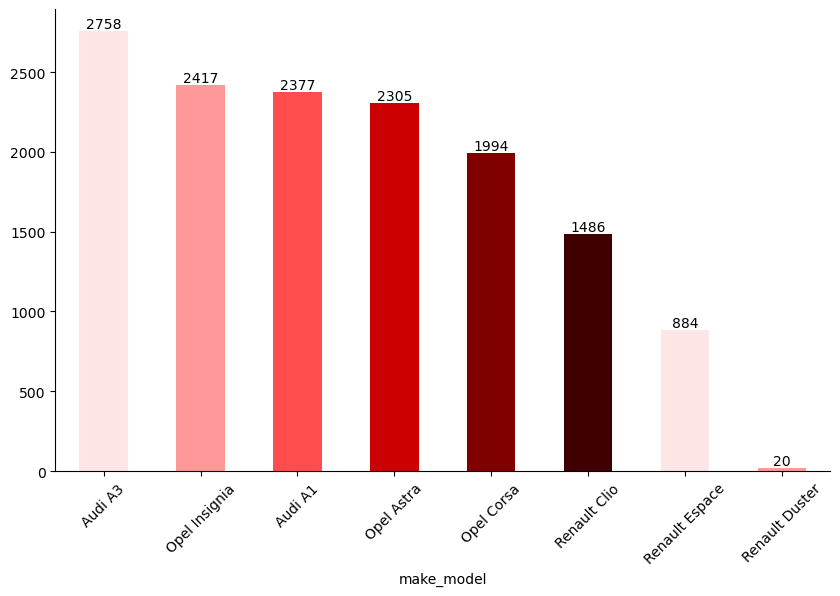

In [19]:

ax = df.make_model.value_counts().plot(
    kind="bar",
    color=custom_palette  # renk paletini uygula
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45) 
ax.bar_label(ax.containers[0]);

PRICE

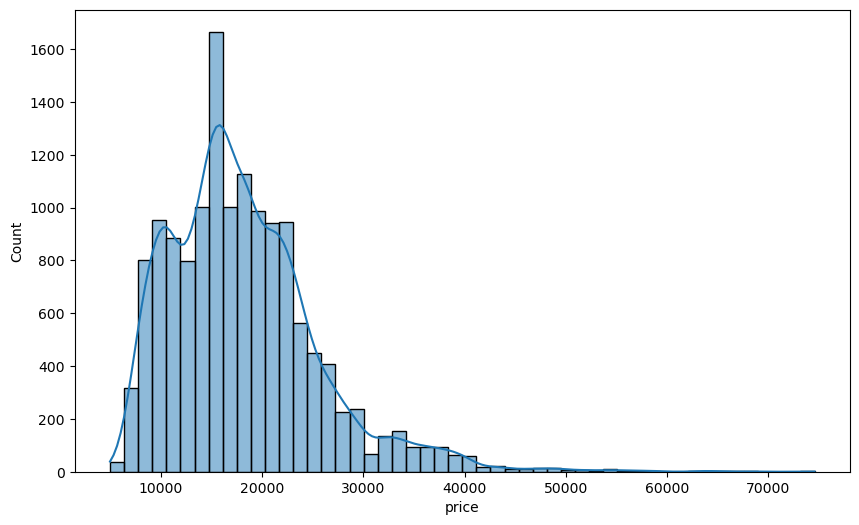

In [20]:
sns.histplot(df.price, bins=50, kde=True);

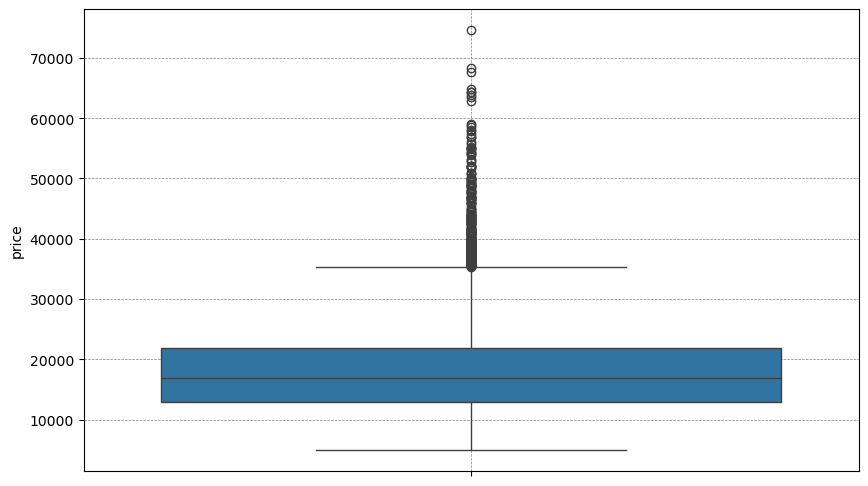

In [21]:
sns.boxplot(df.price)
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5);

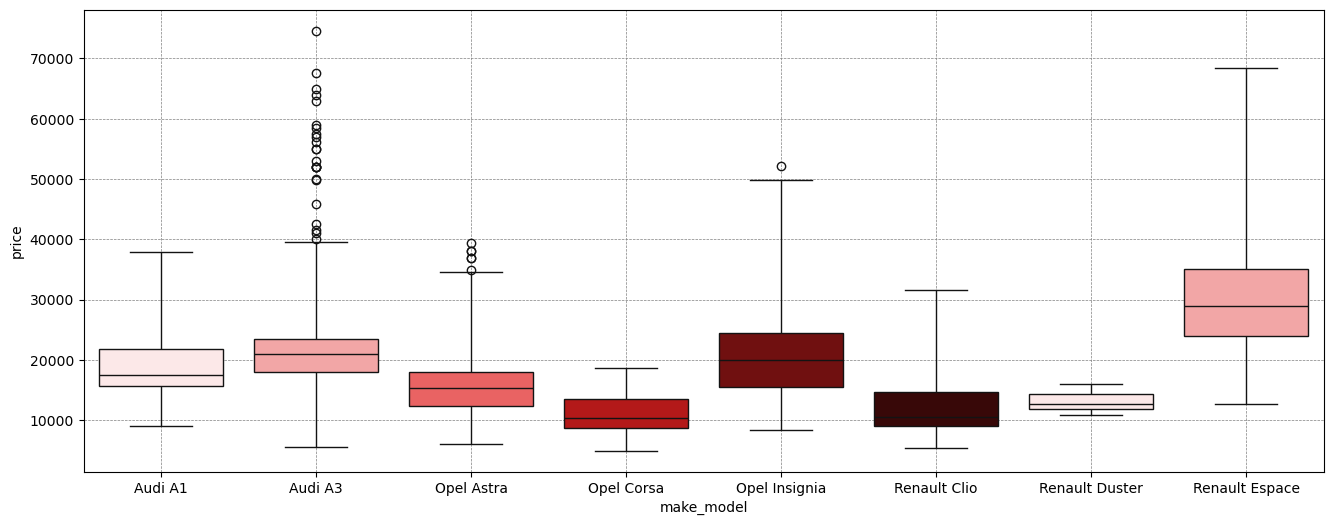

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3, 
            palette=sns.color_palette(custom_palette, 
            n_colors=df["make_model"].nunique()))
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [23]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]  
    
    Q1 = car_prices.quantile(0.25)          # model bazında fiyata göre aykırı değerleri ve oranlarını tespit ediyoruz
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "outliers rate :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 outliers rate : 0.025


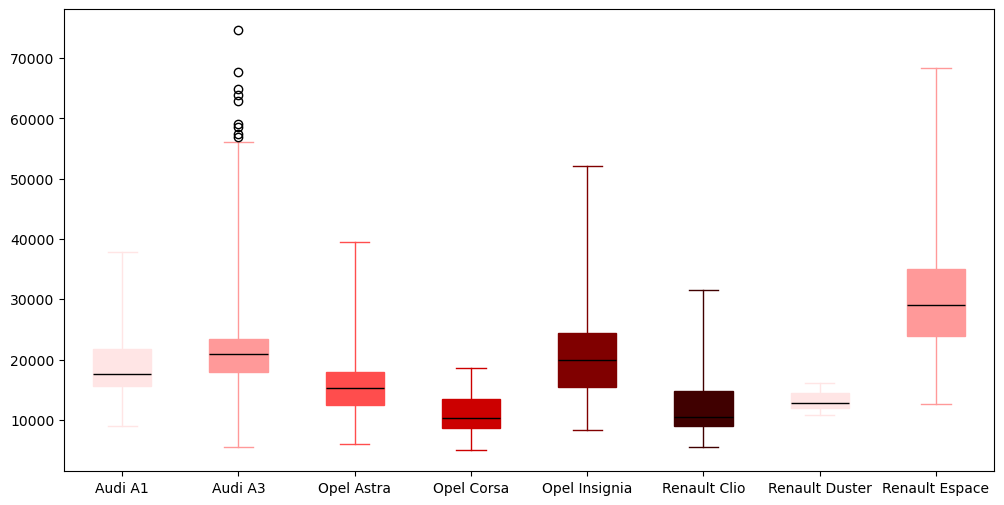

In [24]:
# default 3 olan whiskerları kendimiz tanımlayabiliyoruz
# we can define the whiskers ourselves, which are 3 by default
whisker_values = {
    'Audi A1': 3.0,                 
    'Audi A3': 6.0,                 
    'Opel Astra': 4.0,              
    'Opel Corsa': 3.0,
    'Opel Insignia': 3.5,
    'Renault Clio': 3.0,
    'Renault Duster': 3.0,
    'Renault Espace': 3.0
}
plt.figure(figsize=(12,6))
for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    color = custom_palette[i % len(custom_palette)]  
    plt.boxplot(model_data, 
                positions=[i], 
                whis=whisker_values[make_model], 
                widths=0.5,
                patch_artist=True,  
                boxprops=dict(facecolor=color, color=color),
                whiskerprops=dict(color=color),
                capprops=dict(color=color),
                medianprops=dict(color='black'))  
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()

MULTICOLLINEARITY CONTROL

In [25]:
df_numeric= df.select_dtypes(include ="number")
df_numeric

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
14236,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
14237,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
14238,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
14239,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


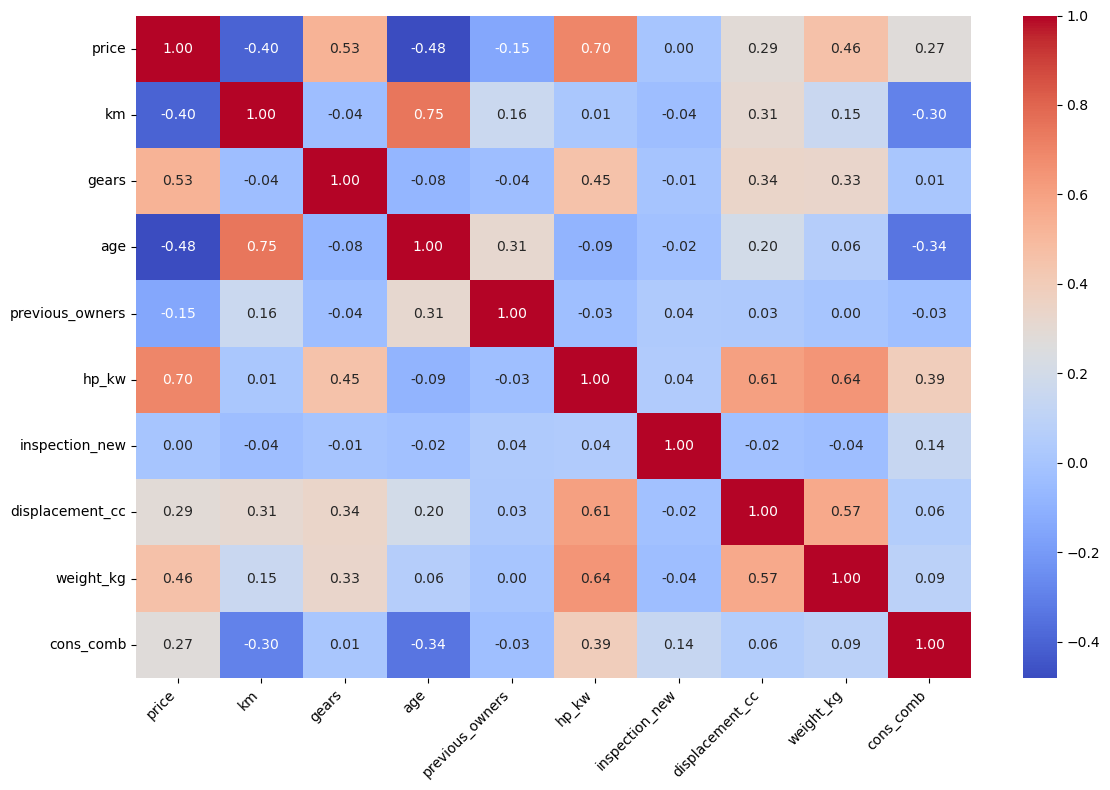

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()
# +0.9 - +1 corr control

False

In [28]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()
# -0.9 - -1 corr control

False

- In the presence of multicollinearity, the high degree of correlation between independent variables 
- makes it difficult to correctly interpret the effect of these variables on the model.
- Correlations greater than 0.9 and 0.9, and less than -0.9 and 0.9, indicate no multicollinearity.

- multicollinearity varlığında, bağımsız değişkenlerin birbirleriyle yüksek derecede korelasyon göstermesi, 
- bu değişkenlerin model üzerindeki etkisinin doğru bir şekilde yorumlanmasını zorlaştırır.
- 0.9 ve 0.9 dan büyük, -0.9 ve 0.9 dan küçük korelasyon yok, multicollinearity yok.

GET DUMMIES

- Converts categorical columns into new columns using binary encoding. Each category is encoded as a feature and coded as 1 if the feature is present, and 0 if it is not.
- Kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.

In [29]:
df.select_dtypes(include ="object").head(3)

,make_model,body_type,vat,type,fuel,comfort_convenience,entertainment_media,extras,safety_security,paint_type,upholstery_type,gearing_type,drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front


In [30]:
df.dtypes.value_counts()

object     13
float64     8
int64       2
Name: count, dtype: int64

In [31]:
# virgülle ayrılmış metinleri ayrı birer sütun olarak temsil edildiği yeni sutunlara dönüştürür
# converts comma-separated text into new columns where each column represents a separate column

df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [32]:
df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)
# str.get_dummies ile her özellik için ayrı sütunlar oluşturduk.  orijinal sütunları kaldırdık.
# We created separate columns for each feature with str.get_dummies. we removed the original columns.

In [33]:
df = pd.get_dummies(df, drop_first =True)
# drop_first=True, ilk kategoriye ait sütunu oluşturmaz. Bu, overfitting ve multicollinearity riskini azaltır.
# drop_first=True does not create a column for the first category. This reduces the risk of overfitting and multicollinearity.

In [34]:
bool_columns = df.columns[df.dtypes == 'bool']

In [35]:
# boolean değerleri integer'a dönüştür
# boolean to integer
df[bool_columns] = df[bool_columns].astype(int)         

In [36]:
df.dtypes.value_counts()

int64      96
int32      29
float64     8
Name: count, dtype: int64

In [37]:
df.head()  # model için hazır, bütün sütunlar sayısal 
        # we are ready for the model, all columns are numerical

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [38]:
df.shape   

(14241, 133)

In [39]:
df.isnull().any().any() # DataFrame'de eksik değer olup olmadığını kontrol eder

False

In [40]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price
# 'price' ile olan korelasyonları küçükten büyüğe sıralıyoruz
# [:-1] kullanarak hedef değişkeni ('price') hariç tutuyoruz
# Sort correlations with 'price' in ascending order
# Use [:-1] to exclude the target variable itself ('price')

age                                        -0.481
gearing_type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
type_Used                                  -0.368
make_model_Renault Clio                    -0.281
drive_chain_front                          -0.159
previous_owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


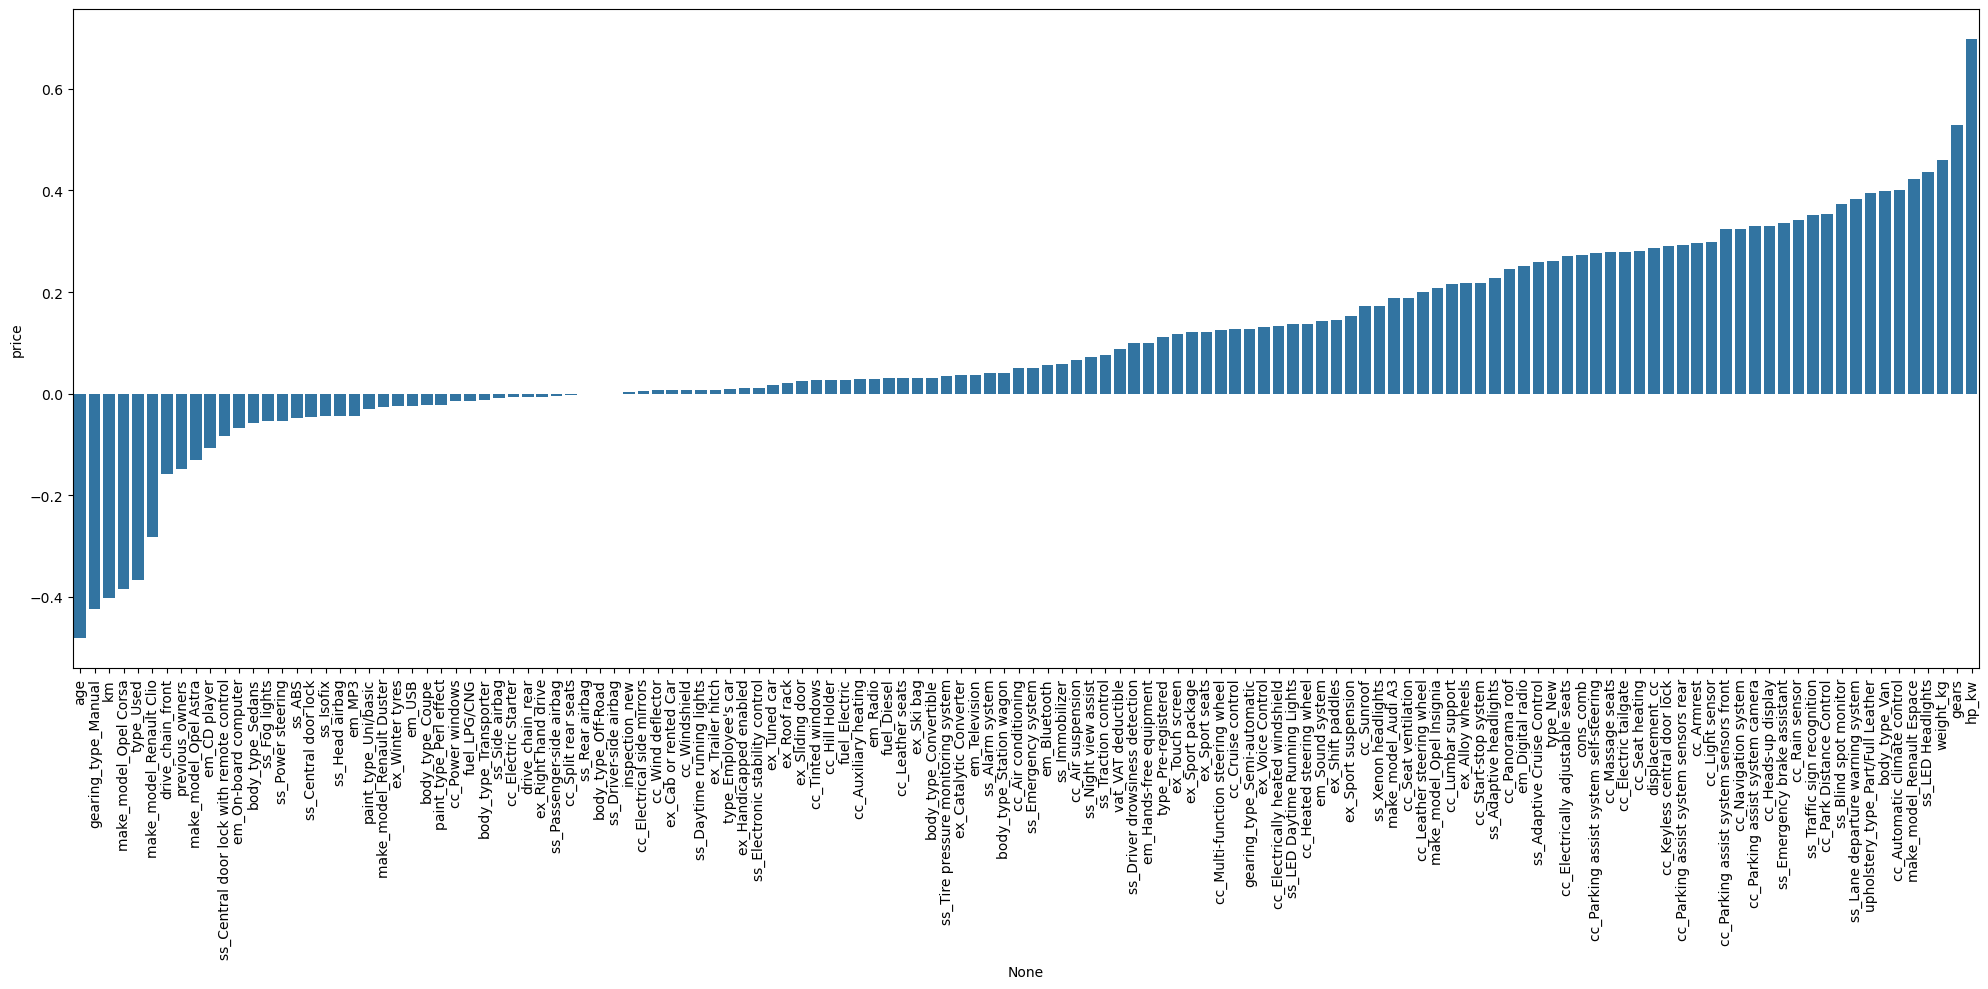

In [41]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# <font color='green'> <b>FIRST MODEL</b><font color='black'>

# Train | Test Split

In [42]:
X= df.drop(columns="price")
y= df.price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(11392, 132)
(2849, 132)


# LINEAR Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression() 

In [47]:
lm.fit(X_train,y_train)

LinearRegression()

### LINEAR Regression SCORE

In [48]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [49]:
lm_score = train_val(lm, X_train, y_train, X_test, y_test)  
lm_score

,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [50]:
2501/df.price.mean()
# modelimiz ortalama %13.8 hata yapıyor.
# our model makes an average of 13.8% error.

0.13817480842212715

Adjusted R2 Score

R² skoru her yeni feature ile artabilir ve bu yanıltıcı olabilir.
Adjusted R², feature sayısını dikkate alır ve çoklu feature'lı modellerde daha güvenilirdir.

R² can increase with each added feature, which may be misleading.
Adjusted R² accounts for the number of features and is more reliable in multi-feature models.

In [51]:
# adjusted R2 function
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       
    n = df.shape[0]                     
    p = df.shape[1]-1                    
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [52]:
y_pred = lm.predict(X_test) # test seti için tahmin (prediction for test set)

In [53]:
y_train_pred = lm.predict(X_train) # train seti için tahmin (prediction for train set)

In [54]:
adj_r2(y_test, y_pred, df)      

0.8828492602064296

CROSS VALİDATION

Cross-validation ve skorlamalar, modelin genelleme yeteneğini değerlendirmek ve overfitting’i tespit etmek için önemlidir.
Gerçek veri üzerindeki performansı daha doğru yansıtır.

Cross-validation and scoring metrics are essential to evaluate generalization and detect overfitting.
They provide a more accurate view of real-world performance.

In [55]:
model = LinearRegression()  # modelimizi sıfırdan tanımlıyoruz
                            # cross_validate ile modelimizin train ve test scorelarını hesaplıyoruz.
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
            cv =10, return_train_score=True)

In [56]:
pd.DataFrame(scores)        # train datasının 10 ayrı parçasında scorelar hesaplandı
                            # scores for 10 different parts of the train data were calculated

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.158,0.013,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,1.115,0.011,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.971,0.011,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.998,0.011,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,1.023,0.012,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.922,0.009,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.998,0.010,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.983,0.012,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.967,0.011,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,1.157,0.010,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [57]:
pd.DataFrame(scores).iloc[:, 2:].mean()  
# score ların ortalaması birbirine yakın, Overfitting yok
# The averages of the scores are close to each other, there is no Overfitting

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

### Residual Plot

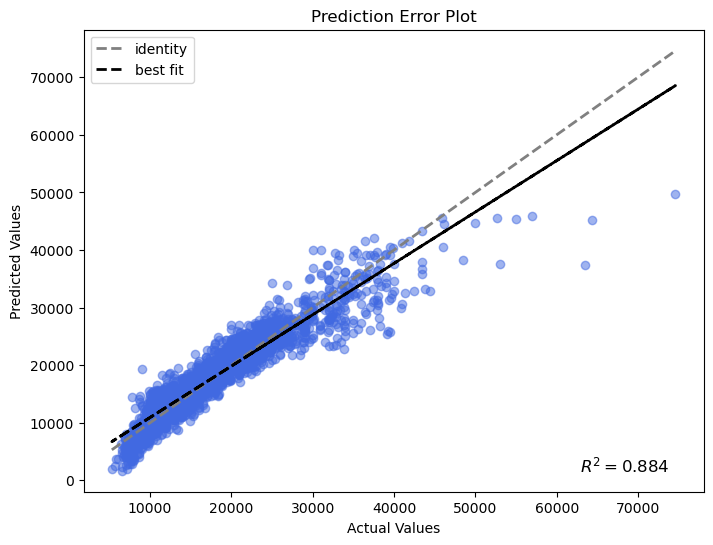

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'gray', linestyle='--', linewidth=2, label="identity")
coef = np.polyfit(y_test, y_pred, 1)   
poly1d_fn = np.poly1d(coef)
plt.plot(y_test, poly1d_fn(y_test), 'k--', linewidth=2, label="best fit")
r2 = r2_score(y_test, y_pred)
plt.text(0.80, 0.08, f"$R^2 = {r2:.3f}$", 
        transform=plt.gca().transAxes, 
        fontsize=12, 
        verticalalignment='top')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.legend(loc="upper left")
plt.show()

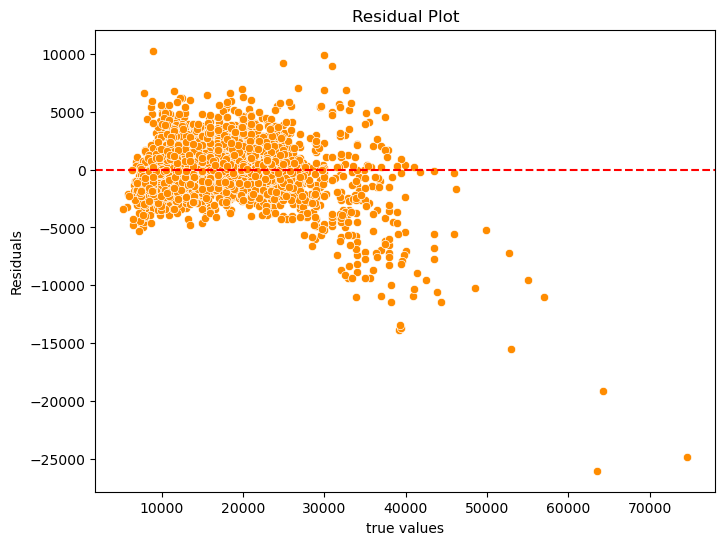

In [59]:
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals, color='darkorange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('true values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

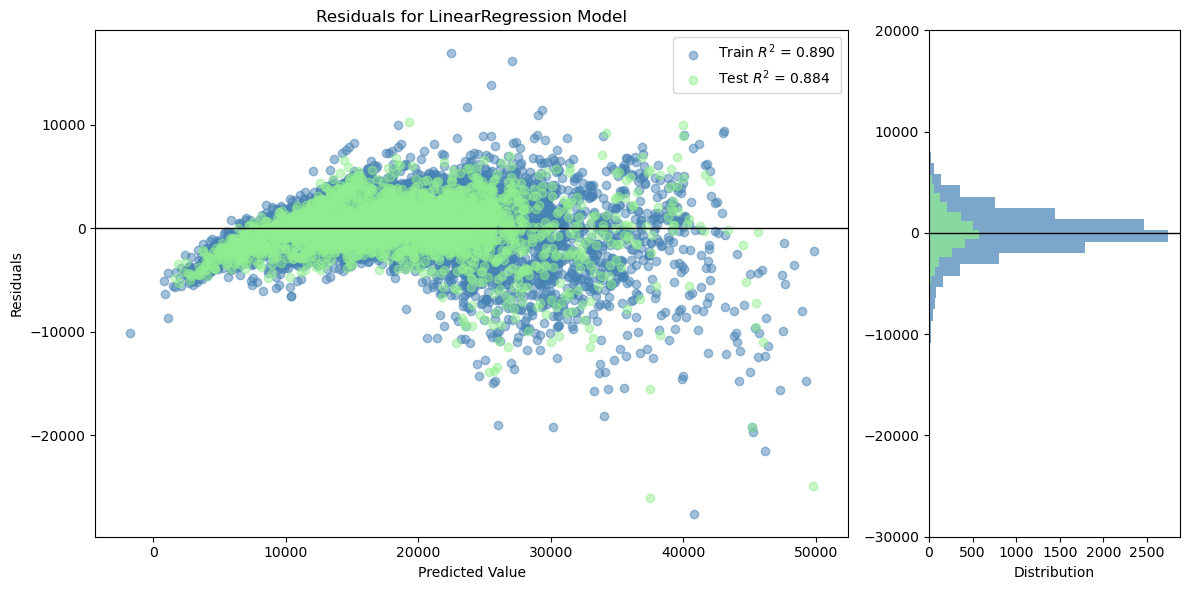

In [60]:
train_residuals = y_train_pred - y_train
test_residuals = y_pred - y_test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={"width_ratios":[3,1]})

ax_scatter.scatter(y_train_pred, train_residuals, alpha=0.5,label=f"Train $R^2$ = {r2_train:.3f}", color="steelblue")
ax_scatter.scatter(y_pred, test_residuals, alpha=0.5,label=f"Test $R^2$ = {r2_test:.3f}", color="lightgreen")
ax_scatter.axhline(0, color="black", linewidth=1)
ax_scatter.set_xlabel("Predicted Value")
ax_scatter.set_ylabel("Residuals")
ax_scatter.set_title("Residuals for LinearRegression Model")
ax_scatter.legend()

ax_hist.hist(train_residuals, bins=40, color="steelblue", alpha=0.7, orientation="horizontal")
ax_hist.hist(test_residuals, bins=40, color="lightgreen", alpha=0.7, orientation="horizontal")
ax_hist.axhline(0, color="black", linewidth=1)
ax_hist.set_xlabel("Distribution")
ax_hist.set_yticks(ax_scatter.get_yticks()) 
ax_hist.set_ylabel("")

plt.tight_layout()
plt.show()

# <font color='green'> <b>INSIGHTS</b><font color='black'>

- yaklaşık 35 bin üzeri fiyatlı araçlar, grafiklerden de anlaşılacağı üzere tahmin hatasını arttırıyor.
- 35 bin altı fiyatlı araçlarla devam edeceğiz.

    - linear 
        - ridge grid
            - lasso grid
                - elastik grid 

- modellerini uygulayıp skorlarını alacağız.
- skorları karşılaştırıp final modeli belirleyeceğiz.

* Vehicles priced above approximately 35,000 increase the prediction error, as seen in the graphs.

* We will continue with vehicles priced below 35,000.

  * linear

    * ridge grid

      * lasso grid

        * elastic net grid

* We will apply these models and obtain their scores.

* Then, we will compare the scores and select the final model.

### Dropping observations from the dataset that worsen my predictions

In [61]:
df1 = df[~(df.price>35000)]
df1.head()
# fiyatı 35.000'den büyük olmayan satırları (gözlemleri) filtrelemek için
# Tilde (~) operatörü, mantıksal bir değerin tersini almak için kullanılır. 
# to filter rows (observations) with a price not greater than 35.000
# The tilde (~) operator is used to take the logical opposite of a value. 

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [62]:
df1.shape

(13768, 133)

# <font color='green'> <b>MODELINGS</b><font color='black'>

## <font color='orange'> <b>MODEL 1</b><font color='black'>

## LINEAR Regression Model

In [63]:
# with df1
X = df1.drop(columns = "price")
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = lm1.predict(X_test)
y_train_pred = lm1.predict(X_train)

### LINEAR Regression Score

In [66]:
lm1_score = train_val(lm1, X_train, y_train, X_test, y_test)
lm1_score

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [67]:
1959/df1.price.mean() # Model error with df1 is 11%

0.11312872973310394

In [68]:
2501/df.price.mean() # The model error with df was 13.8%.

0.13817480842212715

In [69]:
y_pred = lm1.predict(X_test)                    
lm_R2 = r2_score(y_test, y_pred)               
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

In [70]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [71]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
10007,12490,13045.331,-555.331
4875,24510,23966.239,543.761
3493,21490,23585.139,-2095.139
13208,11390,13196.715,-1806.715
370,15889,15320.785,568.215
13636,18900,21640.744,-2740.744
6744,14800,16512.004,-1712.004
4539,20400,19538.217,861.783
7398,17992,20545.125,-2553.125
1113,15900,16798.819,-898.819


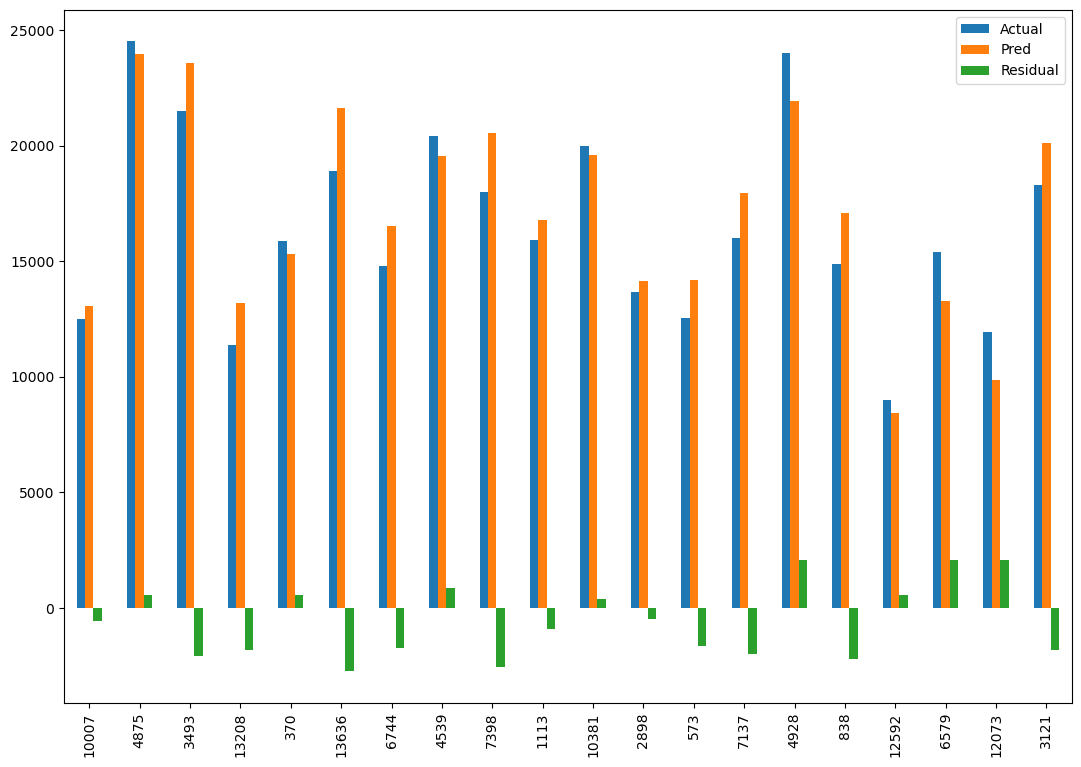

In [72]:
comp_sample.plot(kind='bar',figsize=(13,9))
plt.show()

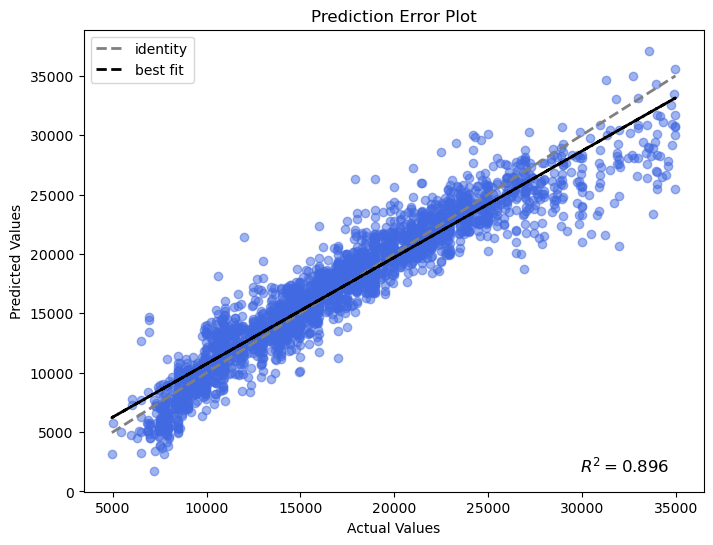

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'gray', linestyle='--', linewidth=2, label="identity")
coef = np.polyfit(y_test, y_pred, 1)   # lineer regresyon katsayıları
poly1d_fn = np.poly1d(coef)
plt.plot(y_test, poly1d_fn(y_test), 'k--', linewidth=2, label="best fit")
r2 = r2_score(y_test, y_pred)
plt.text(0.80, 0.08, f"$R^2 = {r2:.3f}$", 
        transform=plt.gca().transAxes, 
        fontsize=12, 
        verticalalignment='top')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.legend(loc="upper left")
plt.show()

##### price < 35000 with df1 R2--> 0.896 
##### price with df R2 --> 0.884
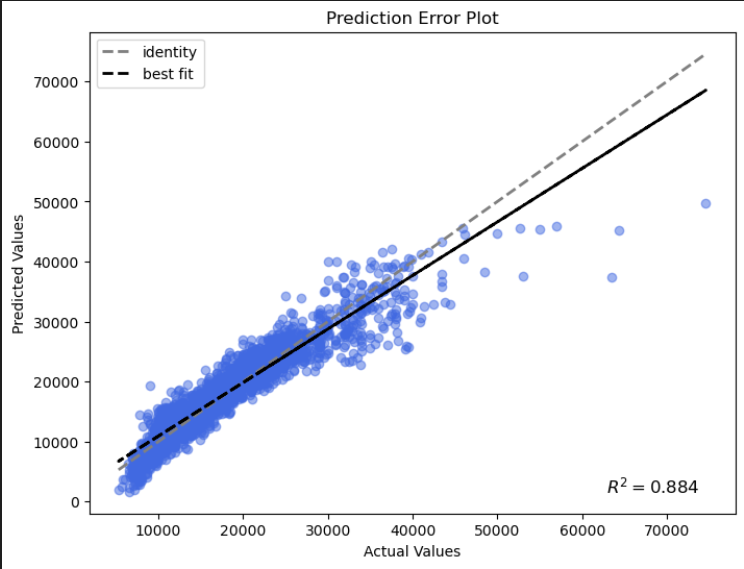

#### NOT: Buraya kadarki süreçte scale(ölçeklendirme) işlemi yapmadık, Pipeline kendi içinde yapıyor, diğer modellerde ise kendimiz yapacağız.
#### NOTE: We have not performed any scaling operations up to this point; the Pipeline handles this internally, while we will perform it ourselves in other models.

## Pipe Model

- Pipeline, veri bilimi ve makine öğrenimi iş akışlarını daha verimli ve güvenilir hale getirir. Her adımın doğru sırayla ve sadece eğitim verisi üzerinde uygulanmasını sağlayarak, veri sızıntısını önler ve modelin genelleştirme yeteneğini artırır. Ayrıca, model seçimi ve parametre ayarlama sürecini basitleştirir ve hataları azaltır.

- Pipeline makes data science and machine learning workflows more efficient and reliable. By ensuring that each step is applied in the correct order and only on training data, it prevents data leakage and improves the model's generalization ability. It also simplifies the model selection and parameter tuning process and reduces errors.

In [74]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

In [75]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train) 

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

- Önce veriyi MinMaxScaler ile ölçeklendirir ve ardından ölçeklendirilmiş veri üzerinde LinearRegression modelini eğitir.
- First, it scales the data using MinMaxScaler and then trains the LinearRegression model on the scaled data.

### Pipe Model Score

In [76]:
pm_score = train_val(pipe_model, X_train, y_train, X_test, y_test)   
pm_score

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


## <font color='orange'> <b>MODEL 2</b><font color='black'>

## Ridge Regression Model

### scale (ölçeklendirme)

In [77]:
scaler = MinMaxScaler()
scaler.fit(X_train)                         # Data Leakage(veri sızıntısı) önlemek için sadece train veri setini fit
                                            # To prevent data leakage, only fit the training data set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge_model = Ridge(alpha=1, random_state=42)

In [80]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

### Ridge Regression Score

In [81]:
rm_score = train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)
rm_score

,train,test
R2,0.898,0.896
mae,1413.716,1412.912
mse,3794938.109,3829231.926
rmse,1948.060,1956.842


## Finding best alpha for Ridge (ridge_grid_model)

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
alpha_space = np.linspace(0.01, 100, 100)
# hyperparametre uzayı için 0.01 ile 100 arasında eşit aralıklı 100 farklı değer 
# 100 different values equally spaced between 0.01 and 100 for the hyperparameter space 

In [84]:
ridge_model = Ridge(random_state=42) 

In [85]:
param_grid = {"alpha":alpha_space}

In [86]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                        param_grid=param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=10,
                        n_jobs = -1)

In [87]:
ridge_grid_model.fit(X_train_scaled,y_train) 

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [88]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [89]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02, random_state=42)

### Ridge Grid Model Score

In [90]:
rgm_score = train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
rgm_score

,train,test
R2,0.898,0.896
mae,1413.712,1412.875
mse,3795015.419,3829086.131
rmse,1948.080,1956.805


In [91]:
y_pred = ridge_grid_model.predict(X_test_scaled)    
rm_R2 = r2_score(y_test, y_pred)                    
rm_mae = mean_absolute_error(y_test, y_pred)          
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

## <font color='orange'> <b>MODEL 3</b><font color='black'>

## Lasso Regression Model

In [92]:
from sklearn.linear_model import Lasso

In [93]:
lasso_model = Lasso(random_state=42, alpha=1)

In [94]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

### Lasso Regression Score

In [95]:
lsm_score = train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
lsm_score

,train,test
R2,0.898,0.896
mae,1414.170,1409.010
mse,3806483.613,3814782.540
rmse,1951.021,1953.147


## Finding best alpha for Lasso (lasso_grid_model)

In [96]:
lasso_model = Lasso(random_state=42)
param_grid = {'alpha':alpha_space}
lasso_grid_model = GridSearchCV(estimator=lasso_model,
                param_grid=param_grid,
                scoring='neg_root_mean_squared_error',
                cv=10,
                n_jobs = -1)

In [97]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [98]:
lasso_grid_model.best_params_

{'alpha': 1.02}

### Lasso Grid Model Score

In [99]:
lsgm_score = train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
lsgm_score

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [100]:
y_pred = lasso_grid_model.predict(X_test_scaled)            
lasm_R2 = r2_score(y_test, y_pred)                          
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## <font color='orange'> <b>MODEL 4</b><font color='black'>

## ElasticNet Model

In [101]:
from sklearn.linear_model import ElasticNet

In [102]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

### ElasticNet Model Score

In [103]:
em_score = train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)
em_score

,train,test
R2,0.584,0.592
mae,3099.732,3053.445
mse,15472875.539,15016869.532
rmse,3933.558,3875.161


### Finding best alpha and l1_ratio for ElasticNet (elastik_grid_model) 

In [104]:
elastic_model = ElasticNet(random_state=42)

In [105]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
            'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
            param_grid=param_grid,
            scoring='neg_root_mean_squared_error',
            cv=10,
            n_jobs = -1)

### `alpha` (Düzenleme şiddeti | Regularization strength)

- `alpha = 0`: Düzenleme yapılmaz. `alpha ↑`: Düzenleme artar, overfitting riski azalır.
-
-
- `alpha = 0`: No regularization applied. `alpha ↑`: Stronger regularization, helps reduce overfitting.

### `l1_ratio` (L1–L2 karışımı | L1–L2 mix)

- `l1_ratio = 1`: Tamamen L1 (Lasso)  `l1_ratio = 0`: Tamamen L2 (Ridge)  
-
- `0 < l1_ratio < 1`: L1 ve L2’nin karışımı (örnek: `0.5` = eşit karışım)
-
-
- `l1_ratio = 1`: Pure L1 (Lasso) `l1_ratio = 0`: Pure L2 (Ridge)  
-
- `0 < l1_ratio < 1`: A combination of both (e.g., `0.5` = equal mix)

In [106]:
elastic_grid_model.fit(X_train_scaled,y_train)  

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [107]:
elastic_grid_model.best_params_ # elastic grid de lasso seçti
                                # elastic grid chose lasso (l1_ratio=1)

{'alpha': 1.02, 'l1_ratio': 1}

### ElasticNet Grid Model Score

In [108]:
egm_score = train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
egm_score

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [109]:
y_pred = elastic_grid_model.predict(X_test_scaled)      
em_R2 = r2_score(y_test, y_pred)                         
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  

## <font color='orange'> <b>COMPARISON</b><font color='black'>

In [110]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144


- SONUÇ: En iyi r2 ve rmse skoru lasso model
- The best r2 and rmse score is the lasso model

In [111]:
lasso_grid_model.best_estimator_

Lasso(alpha=1.02, random_state=42)

# <font color='purple'> <b>Feature Importance</b><font color='black'>

In [112]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)    
y_pred = lasso.predict(X_test_scaled)

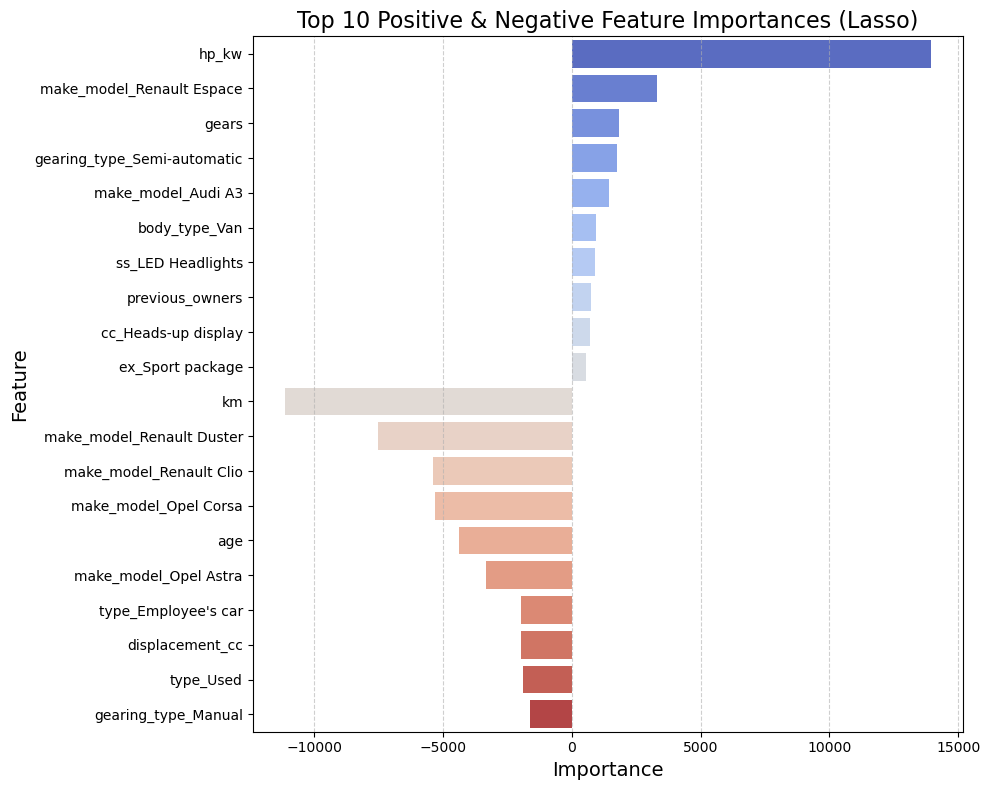

In [113]:
coef_df = pd.DataFrame(lasso.coef_, index=X.columns, columns=["Coef"]).sort_values("Coef")

top_pos = coef_df.sort_values("Coef", ascending=False).head(10)
top_neg = coef_df.sort_values("Coef").head(10)
coef_df_selected = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10,8))
sns.barplot(
    x="Coef",
    y=coef_df_selected.index,
    data=coef_df_selected,
    palette="coolwarm"
)
plt.title("Top 10 Positive & Negative Feature Importances (Lasso)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

["make_model", "hp_kw", "km", "age", "gearing_type"] top 5 features

In [114]:
df0.info()  # datamızın ham halini getirelim
            # let's get the raw form of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [115]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


- NOT: datanın ham hali ile çalıştığımızdan EDA işlemlerini tekrar yapıyoruz.
- NOTE: Since we are working with raw data, we are performing EDA operations again.

# <font color='purple'> <b>EDA</b><font color='black'>

In [116]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [117]:
df_new.drop(index=[2614], inplace=True)

In [118]:
df_new = df_new[~(df_new.price > 35000)]

In [119]:
df_new.isnull().sum().sum()

0

In [120]:
def duplicate_values(df):
    print("Duplicate check...")
    initial_rows = len(df)
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print(f"There are {num_duplicates} duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        removed_rows = initial_rows - len(df)
        print(f"{removed_rows} duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df_new)  

Duplicate check...
There are 2336 duplicated observations in the dataset.
2336 duplicates were dropped!
No more duplicate rows!


In [121]:
def check_index(df):
    print("📊 Index Kontrol Raporu")
    print("-"*30)
    
    # 1️⃣ Art arda artıyor mu?
    print("Artan mı:", df.index.is_monotonic_increasing)
    
    # 2️⃣ 0’dan başlayıp art arda gidiyor mu?
    expected_index = range(len(df))
    continuous = all(df.index == expected_index)
    print("0'dan başlayıp art arda mı:", continuous)
    
    # 3️⃣ Duplicate index var mı?
    duplicates = df.index.duplicated().any()
    print("Duplicate index var mı:", duplicates)
    
    # Genel bozukluk durumu
    if df.index.is_monotonic_increasing and continuous and not duplicates:
        print("✅ Index düzgün.")
    else:
        print("❌ Index bozuk, resetlemeniz gerekebilir.")
check_index(df_new)  # index kontrolü

📊 Index Kontrol Raporu
------------------------------
Artan mı: True
0'dan başlayıp art arda mı: False
Duplicate index var mı: False
❌ Index bozuk, resetlemeniz gerekebilir.


In [122]:
df = df.reset_index(drop=True)

In [123]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,False,False,False,False,False,False,False,False,False
1,141.000,80000.000,2.000,14500,False,False,False,False,False,False,False,False,False
2,85.000,83450.000,3.000,14640,False,False,False,False,False,False,False,False,False
3,66.000,73000.000,3.000,14500,False,False,False,False,False,False,False,False,False
4,66.000,16200.000,3.000,16790,False,False,False,False,False,False,False,False,False


In [124]:
bool_columns = df_new.columns[df_new.dtypes == 'bool']
df_new[bool_columns] = df_new[bool_columns].astype(int) 

In [125]:
len(df_new)

13083

In [126]:
df_new.dtypes.value_counts()

int32      9
float64    3
int64      1
Name: count, dtype: int64

# <font color='purple'> <b>Lasso Final Model</b><font color='black'>

In [127]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [129]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
lasso_model = Lasso(random_state=42)
param_grid = {'alpha': alpha_space}
lasso_final_model = GridSearchCV(estimator=lasso_model,
                param_grid=param_grid,
                scoring='neg_root_mean_squared_error',
                cv=10,
                n_jobs=-1)

In [131]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [132]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [133]:
lasso_final_model.best_score_

-2221.469217529216

In [134]:
ls_final_score = train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)
ls_final_score

,train,test
R2,0.866,0.863
mae,1587.370,1601.043
mse,4926100.912,5094058.364
rmse,2219.482,2257.002


In [135]:
2257 / df_new.price.mean()

0.1305121949987331

In [136]:
y_pred = lasso_final_model.predict(X_test_scaled) 
lfm_R2 = r2_score(y_test, y_pred)                  
lfm_mae = mean_absolute_error(y_test, y_pred)
lfm_rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # model karşılaştırmada kullanacağız 5

# Compare Models Performance

In [137]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "lasso_fm": {
        "r2_score": lfm_R2,
        "mae": lfm_mae,
        "rmse": lfm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144
lasso_fm,0.863,1601.043,2257.002


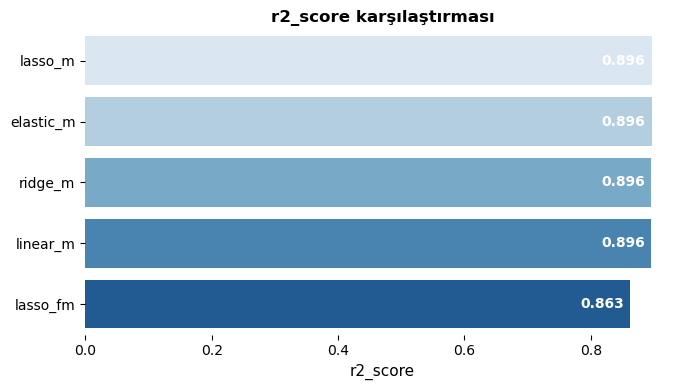

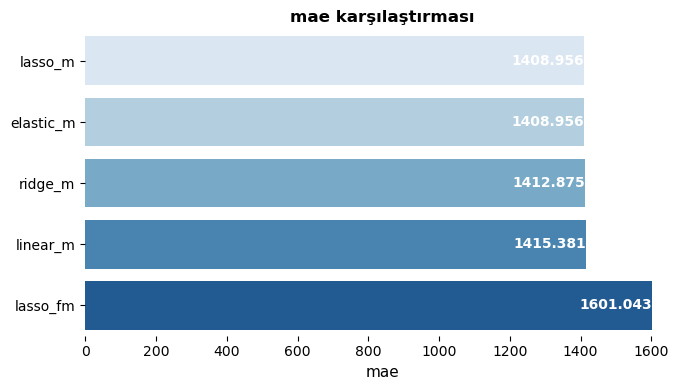

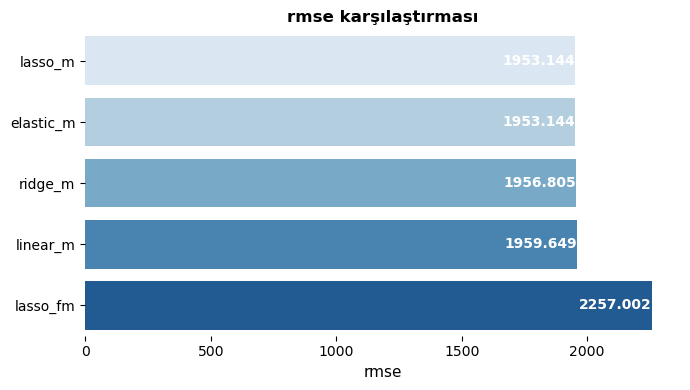

In [138]:
for i, j in enumerate(scores):
    plt.figure(i, figsize=(7,4))
    
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    palette = sns.color_palette("Blues", len(compare))
    ax = sns.barplot(
        x=compare[j], 
        y=compare.index, 
        palette=palette, 
        edgecolor="none"
    )
    for p in ax.patches:
        ax.text(
            p.get_width() - 0.01,                     
            p.get_y() + p.get_height()/2, 
            f"{p.get_width():.3f}",                  
            ha="right", va="center", color="white", fontsize=10, fontweight="bold"
        )
    # Stil ayarları
    ax.set_title(f"{j} karşılaştırması", fontsize=12, weight="bold")
    ax.set_xlabel(j, fontsize=11)
    ax.set_ylabel("")
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# <font color='red'> <b>FİNAL MODEL</b><font color='black'>

In [139]:
# Son aşamada train ve test seti şeklinde ayırım yapmıyoruz.
# In the final stage, we do not separate into train and test sets.
# Tüm veriyi kullanarak modeli eğitiyoruz.
# We train the model using all the data.
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [140]:
lasso_model = Lasso(max_iter=100000)
param_grid = {'alpha': alpha_space}
final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [141]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [142]:
final_model.best_estimator_

Lasso(alpha=0.01, max_iter=100000)

# Prediction with new observation

In [143]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gears": 7,
    "Gearing_Type": "Automatic"
}

In [144]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gears,Gearing_Type
0,66,2,17000,Audi A3,7,Automatic


In [145]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,Gears,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,7,True,True


In [146]:
X.head(1)

# predict ettireceğimiz gözlemin feature sıralaması eğitim verdiğimiz datanın feature sıralaması aynı olmalı.
# The feature order of the observation we will predict must be the same as the feature order of the data we trained.

,hp_kW,km,age,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,0,0,0,0,0,0,0,0,0


In [147]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,True,0,0,0,0,0,0,0,0


In [148]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [149]:
final_model.predict(my_dict)

array([19536.51492579])

## Prediction with random samples

In [150]:
random_samples = df_new.sample(n=20)

In [151]:
X_random = random_samples.drop(columns=["price"])

In [152]:
X_random = final_scaler.transform(X_random)

In [153]:
predictions = final_model.predict(X_random)
predictions

array([23924.21597824, 11251.13095732, 16626.01134538, 22933.20471681,
       22519.6268591 , 20240.58617115, 27163.25566876, 13873.1807074 ,
        4380.47864773, 12637.38329651, 20988.50962179, 20251.11908013,
       26221.81922048, 15412.70912682, 19560.8690414 , 20491.59341194,
       21619.99955156,  6754.06567898, 28816.2692109 , 13517.6057801 ])

In [154]:
true_labels = random_samples["price"].values
true_labels

array([25600, 15900, 18990, 24990, 22950, 22800, 26970, 10990,  6690,
       12955, 20400, 18480, 29790, 14970, 16690, 20940, 22950,  7500,
       28880, 13480], dtype=int64)

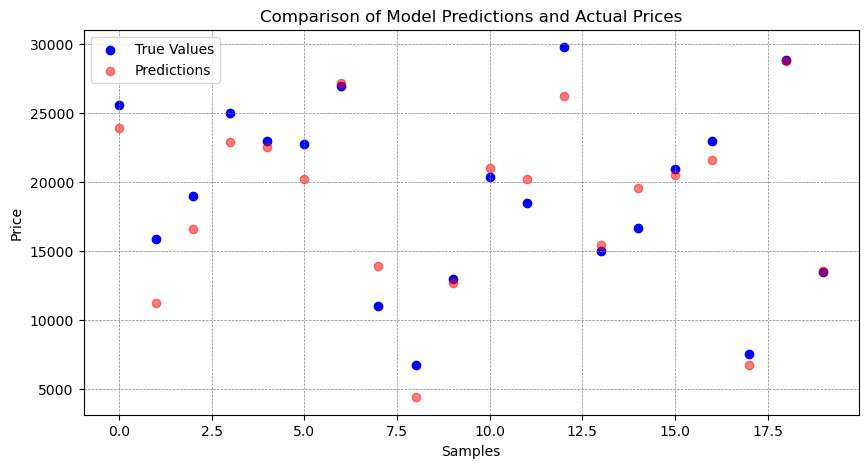

In [156]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='True Values')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.5)
plt.title('Comparison of Model Predictions and Actual Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True) 
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()